In [1]:
using Pkg

In [2]:
Pkg.instantiate()

In [3]:
Pkg.update()

    Updating registry at `C:\Users\pedroripper\.julia\registries\General.toml`
   Installed VectorizationBase ─ v0.21.66
  No Changes to `D:\git\RBM\example\Project.toml`
    Updating `D:\git\RBM\example\Manifest.toml`
  [3d5dd08c] ↑ VectorizationBase v0.21.65 ⇒ v0.21.66
Precompiling project...
  ✓ VectorizationBase
  ✓ SLEEFPirates
  ✓ LoopVectorization
  ✓ ImageMorphology
  ✓ ImageDistances
  ✓ ImageQualityIndexes
  ✓ ImageSegmentation
  ✓ Images
  8 dependencies successfully precompiled in 71 seconds. 229 already precompiled. 18 skipped during auto due to previous errors.


In [4]:
using QARBoM, MLDatasets, ImageShow

[ Info: Precompiling QARBoM [5d121597-357b-4444-99a5-61a265ddccc8]


In [5]:
using Images

In [6]:
trainset = MNIST(:train)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [7]:
x_train, y_train = trainset[:]

(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [8]:
testset = MNIST(:test)
x_test, y_test = testset[:]

(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [9]:
x_train[:,:,1]

28×28 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0        0.0  0.0  0.0
 ⋮

# making the images binary

In [10]:
x_bin = [
    vec(round.(Int, x_train[:,:,i])) for i in 1:60000
    ]

60000-element Vector{Vector{Int64}}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 

In [11]:
rbm = QARBoM.BernoulliRBM(28*28,500)

QARBoM.BernoulliRBM([-0.456540646205901 -0.17607476440941114 … 0.5835036925497569 0.7313031707813042; -0.6185555109158355 -0.3519386597917289 … 0.35359924497373035 1.2515289652139354; … ; -0.13869971108103496 0.6848429171258714 … 0.8654140821544141 -0.6646552504661029; -1.9494354703555365 -0.011678392642420977 … 2.002262012862229 2.6642022097753726], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 784, 500)

In [12]:
QARBoM.train(rbm, x_bin[1:5000], QARBoM.CD(); n_epochs = 50, cd_steps = 3, learning_rate = 0.01)

|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total |
|--------------------------------------------------------------------------|
|     1 |   65.8648 |       12.4880 |      57.5170 |       21.2730 | 91.28 |
|--------------------------------------------------------------------------|
|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total |
|--------------------------------------------------------------------------|
|     2 |   54.6472 |       10.6250 |      52.3310 |       20.0630 | 174.30 |
|--------------------------------------------------------------------------|
|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total |
|--------------------------------------------------------------------------

|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total |
|--------------------------------------------------------------------------|
|    23 |   42.0240 |       10.2600 |      49.8890 |       19.1780 | 1952.66 |
|--------------------------------------------------------------------------|
|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total |
|--------------------------------------------------------------------------|
|    24 |   41.7988 |       10.8800 |      53.2110 |       20.3120 | 2037.07 |
|--------------------------------------------------------------------------|
|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total |
|-----------------------------------------------------------------------

|--------------------------------------------------------------------------|
|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total |
|--------------------------------------------------------------------------|
|    45 |   37.3048 |        9.7960 |      47.3570 |       18.3970 | 3726.07 |
|--------------------------------------------------------------------------|
|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total |
|--------------------------------------------------------------------------|
|    46 |   37.1762 |        9.9980 |      48.3260 |       18.5740 | 3802.97 |
|--------------------------------------------------------------------------|
|--------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Tot

In [13]:
x_test = [
    vec( x_test[:,:,i]) for i in 1:10000
    ]

10000-element Vector{Vector{Float32}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0,

In [16]:
x_bin_test = [
    vec(round.(Int, x_test[i])) for i in 1:10000
    ]

10000-element Vector{Vector{Int64}}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 

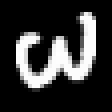

In [55]:
original_vec = x_test[9410]
original_img = 1.0 .* reshape(original_vec, (28,28))
colorview(Gray, original_img)

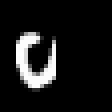

In [30]:
corrupted_vec = vcat(original_vec[1:392], zeros(784-392))
corrupted_img = 1.0 .* reshape(corrupted_vec, (28,28))
colorview(Gray, corrupted_img)

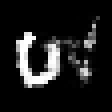

In [31]:
sampled_h = QARBoM.conditional_prob_h(rbm, round.(Int,corrupted_vec))
sampled_x= QARBoM.conditional_prob_v(rbm, round.(Int,sampled_h))
reconstructed_img = 1.0 .* reshape(sampled_x, (28,28))
colorview(Gray, reconstructed_img)

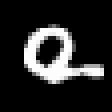

In [90]:
original_vec = x_test[100]
original_img = 1.0 .* reshape(original_vec, (28,28))
colorview(Gray, original_img)

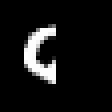

In [91]:
corrupted_vec = vcat(original_vec[1:392], zeros(784-392))
corrupted_img = 1.0 .* reshape(corrupted_vec, (28,28))
colorview(Gray, corrupted_img)

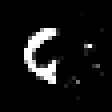

In [92]:
sampled_h = QARBoM.conditional_prob_h(rbm, round.(Int,corrupted_vec))
sampled_x= QARBoM.conditional_prob_v(rbm, round.(Int,sampled_h))
reconstructed_img = 1.0 .* reshape(sampled_x, (28,28))
colorview(Gray, reconstructed_img)

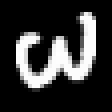

In [93]:
original_vec = x_test[9410]
original_img = 1.0 .* reshape(original_vec, (28,28))
colorview(Gray, original_img)

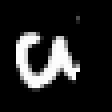

In [109]:
n = 550
corrupted_vec = vcat(original_vec[1:n], zeros(784-n))
corrupted_img = 1.0 .* reshape(corrupted_vec, (28,28))
colorview(Gray, corrupted_img)

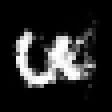

In [110]:
sampled_h = QARBoM.conditional_prob_h(rbm, round.(Int,corrupted_vec))
sampled_x= QARBoM.conditional_prob_v(rbm, round.(Int,sampled_h))
reconstructed_img = 1.0 .* reshape(sampled_x, (28,28))
colorview(Gray, reconstructed_img)